<a href="https://colab.research.google.com/github/superbunny38/DataScience/blob/main/Probability%26Statistics/2Summer_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

# Frequency Table

In [4]:
brown,yellow,red,orange,green,blue = "brown","yellow","red","orange","green","blue"

In [5]:
colors = [brown, brown, yellow, red, red, red, brown, 
orange, blue, green, blue, brown, yellow, 
yellow, brown, red, red, brown, brown, 
brown, green, blue, green, orange, orange, 
yellow, yellow, yellow, red, brown, red, 
brown, orange, green, red, brown, yellow, 
orange, red, green, yellow, yellow, brown, 
yellow, orange]

In [6]:
data1 = pd.Series(colors)

In [7]:
data1.value_counts()

brown     12
yellow    10
red        9
orange     6
green      5
blue       3
dtype: int64

In [13]:
fd = nltk.FreqDist(colors)
fd

FreqDist({'blue': 3,
          'brown': 12,
          'green': 5,
          'orange': 6,
          'red': 9,
          'yellow': 10})

Relative frequency

In [24]:
freq_dict = {}
for k,v in fd.items():
  print(f"{k}: freq: {v}, relative freq: {v/sum(fd.values())}")
  freq_dict[k] = v/sum(fd.values())

brown: freq: 12, relative freq: 0.26666666666666666
yellow: freq: 10, relative freq: 0.2222222222222222
red: freq: 9, relative freq: 0.2
orange: freq: 6, relative freq: 0.13333333333333333
blue: freq: 3, relative freq: 0.06666666666666667
green: freq: 5, relative freq: 0.1111111111111111


## frequency bar graph

Text(0.5, 1.0, 'Bar Graph for M&M Color')

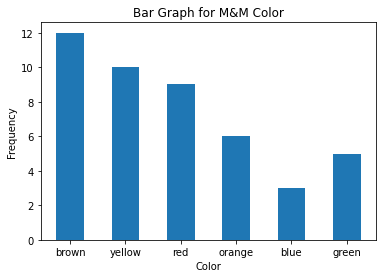

In [41]:
plt.hist(colors,bins=np.arange(7)-0.5,rwidth=0.5)
plt.xlabel("Color")
plt.ylabel("Frequency")
plt.title("Bar Graph for M&M Color")

In [26]:
freq_dict#relative frequency

{'blue': 0.06666666666666667,
 'brown': 0.26666666666666666,
 'green': 0.1111111111111111,
 'orange': 0.13333333333333333,
 'red': 0.2,
 'yellow': 0.2222222222222222}

Text(0.5, 1.0, 'Bar Graph for M&M Color')

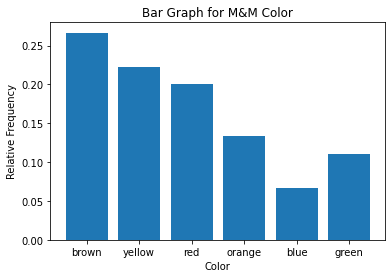

In [42]:
plt.bar(freq_dict.keys(),freq_dict.values())
plt.xlabel("Color")
plt.ylabel("Relative Frequency")
plt.title("Bar Graph for M&M Color")

## Pareto Chart

In [45]:
df = pd.DataFrame({'color':freq_dict.keys(),'rf':freq_dict.values()})

In [46]:
pareto = df.sort_values(by='rf',ascending=False)

Text(0.5, 1.0, 'Bar Graph for M&M Color')

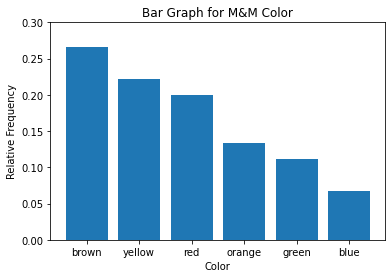

In [48]:
plt.bar(pareto['color'],pareto['rf'])
plt.xlabel("Color")
plt.ylabel("Relative Frequency")
plt.ylim(0,0.3)
plt.title("Bar Graph for M&M Color")

## Comparing Two Data Sets

In [49]:
df2 = pd.DataFrame({'Marital Status':['Never married','Married','Widowed','Divorced'],
                    '1990':[40.4,112.6,13.8,15.1],
                    '2006':[55.3,127.7,13.9,22.8]})


In [51]:
df2['1990rf'] = [x/sum(df2['1990']) for x in df2['1990']]
df2['2006rf'] = [x/sum(df2['2006']) for x in df2['2006']]

In [52]:
df2

,Marital Status,1990,2006,1990rf,2006rf
0,Never married,40.4,55.3,0.222100,0.251707
1,Married,112.6,127.7,0.619021,0.581247
2,Widowed,13.8,13.9,0.075866,0.063268
3,Divorced,15.1,22.8,0.083013,0.103778


(0.0, 0.7)

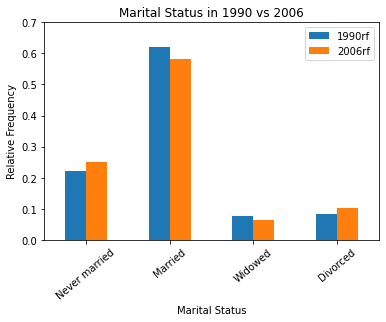

In [58]:
df2.plot.bar(x = 'Marital Status', y = ['1990rf', '2006rf'], rot = 40)
plt.title("Marital Status in 1990 vs 2006")
plt.ylabel("Relative Frequency")
plt.ylim(0,0.7)

## Pie Chart

In [60]:
pie_df = pd.DataFrame({'Marital Status':['Never married','Married','Widowed','Divorced'],'Frequency':[55.3,127.7,13.9,22.8]})

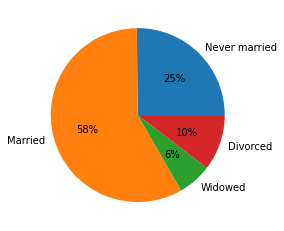

In [66]:
plt.pie(pie_df['Frequency'],labels = pie_df['Marital Status'],autopct='%.0f%%')
plt.show()

# Organize Discrete Data in Tables

The following data represent the number of available cars in a 
household based on a random sample of 50 households. Construct 
a frequency and relative frequency distribution.


In [67]:
cars = [3, 0, 1, 2, 1, 1, 1, 2, 0, 2,
4, 2, 2, 2, 1, 2, 2, 0, 2 ,4,
1, 1, 3, 2, 4, 1, 2, 1 ,2 ,2,
3, 3, 2, 1, 2, 2, 0, 3, 2 ,2,
2, 3, 2, 1, 2, 2, 1, 1, 3 ,5]

In [68]:
len(cars)

50

In [71]:
car_fd = nltk.FreqDist(cars)
car_fd

FreqDist({0: 4, 1: 13, 2: 22, 3: 7, 4: 3, 5: 1})

In [75]:
car_fd.keys()

dict_keys([3, 0, 1, 2, 4, 5])

In [77]:
car_fd.values()

dict_values([7, 4, 13, 22, 3, 1])

In [73]:
car_df = pd.DataFrame({'# of Cars':car_fd.keys(),
             'Frequency':car_fd.values()})
car_df['Relative Frequency'] = [x/sum(car_df['Frequency']) for x in car_df['Frequency']]

In [80]:
sorted_car_df = car_df.sort_values(by = '# of Cars')
sorted_car_df

,# of Cars,Frequency,Relative Frequency
1,0,4,0.08
2,1,13,0.26
3,2,22,0.44
0,3,7,0.14
4,4,3,0.06
5,5,1,0.02


## Histogram (rectangles should touch each other)

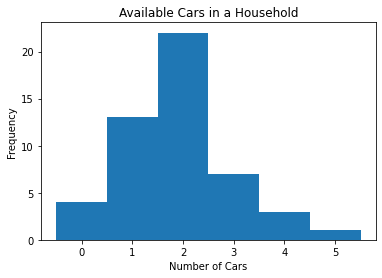

In [93]:
plt.hist(cars,bins = np.arange(7)-0.5)
plt.ylabel("Frequency")
plt.xlabel("Number of Cars")
plt.title("Available Cars in a Household")
plt.show()

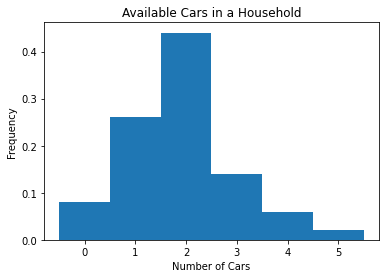

In [97]:
plt.bar(sorted_car_df['# of Cars'], sorted_car_df['Relative Frequency'],width =1)
plt.ylabel("Frequency")
plt.xlabel("Number of Cars")
plt.title("Available Cars in a Household")
plt.show()

## Organize Continuous Data in Tables

### Organizing Continuous Data into a Frequency and Relative Frequency Distribution

The following data represent the time between eruptions (in 
seconds) for a random sample of 45 eruptions at the Old Faithful 
Geyser in Wyoming. Construct a frequency and relative frequency 
distribution of the data.

In [245]:
eruptions = [728, 678, 723, 735, 703, 730, 722,708, 714, 713,
             726, 716, 736, 719, 672, 698, 702, 738, 725, 711, 
             721, 703, 735, 699, 695, 722, 718, 695, 702, 731,
             700, 703, 706, 733, 726, 720, 723, 711, 696, 695,
             729, 699, 714, 700, 718]

In [246]:
len(eruptions)

45

In [247]:
min(eruptions)

672

In [248]:
max(eruptions)

738

670-679
<br>680-689
,...

In [294]:
class1 = []
class2 = []
class3 = []
class4 = []
class5 = []
class6 = []
class7 = []
for e in eruptions:
  if e <680:
    class1.append(e)
    continue
  elif e < 690:
    class2.append(e)
    continue
  elif e < 700:
    class3.append(e)
    continue
  elif e<710:
    class4.append(e)
    continue
  elif e<720:
    class5.append(e)
    continue
  elif e<730:
    class6.append(e)
    continue
  else:
    class7.append(e)
    continue

In [295]:
classes = [class1,class2,class3,class4, class5, class6, class7]

In [296]:
classes

[[678, 672],
 [],
 [698, 699, 695, 695, 696, 695, 699],
 [703, 708, 702, 703, 702, 700, 703, 706, 700],
 [714, 713, 716, 719, 711, 718, 711, 714, 718],
 [728, 723, 722, 726, 725, 721, 722, 726, 720, 723, 729],
 [735, 730, 736, 738, 735, 731, 733]]

In [297]:
len(classes[0])

2

In [298]:
eruptions_df = {}
for i in range(7):
  start = 670 + 10*i
  varname = f'{start} - {start + 9}'
  print(varname,len(classes[i]))
  eruptions_df[varname] = len(classes[i])

670 - 679 2
680 - 689 0
690 - 699 7
700 - 709 9
710 - 719 9
720 - 729 11
730 - 739 7


In [299]:
eruptions_df

{'670 - 679': 2,
 '680 - 689': 0,
 '690 - 699': 7,
 '700 - 709': 9,
 '710 - 719': 9,
 '720 - 729': 11,
 '730 - 739': 7}

In [300]:
eruptions_pandas = pd.DataFrame({'Time btw eruptions':eruptions_df.keys(),
                                  'Frequency':eruptions_df.values()})

In [301]:
eruptions_pandas['Relative Frequency'] = [x/sum(eruptions_pandas['Frequency']) for x in eruptions_pandas['Frequency']]

In [302]:
original_eruptions = eruptions_pandas

In [303]:
original_eruptions

,Time btw eruptions,Frequency,Relative Frequency
0,670 - 679,2,0.044444
1,680 - 689,0,0.000000
2,690 - 699,7,0.155556
3,700 - 709,9,0.200000
4,710 - 719,9,0.200000
5,720 - 729,11,0.244444
6,730 - 739,7,0.155556


smaller interval

In [237]:
eruptions_df = {}
interval = 5
for i in range(14):
  start = 670 + interval*i
  varname = f'{start} - {start + interval-1}'
  tmp = [e for e in eruptions if e >= start and e<= start + interval -1 ]
  eruptions_df[varname] = len(tmp)

In [141]:
eruptions_df

{'670 - 674': 1,
 '675 - 679': 1,
 '680 - 684': 0,
 '685 - 689': 0,
 '690 - 694': 0,
 '695 - 699': 7,
 '700 - 704': 7,
 '705 - 709': 2,
 '710 - 714': 5,
 '715 - 719': 4,
 '720 - 724': 6,
 '725 - 729': 5,
 '730 - 734': 3,
 '735 - 739': 4}

In [142]:
eruptions_pandas = pd.DataFrame({'Time btw eruptions':eruptions_df.keys(),
                                  'Frequency':eruptions_df.values()})
eruptions_pandas['Relative Frequency'] = [x/sum(eruptions_pandas['Frequency']) for x in eruptions_pandas['Frequency']]
eruptions_pandas

,Time btw eruptions,Frequency,Relative Frequency
0,670 - 674,1,0.022222
1,675 - 679,1,0.022222
2,680 - 684,0,0.000000
3,685 - 689,0,0.000000
4,690 - 694,0,0.000000
5,695 - 699,7,0.155556
6,700 - 704,7,0.155556
7,705 - 709,2,0.044444
8,710 - 714,5,0.111111
9,715 - 719,4,0.088889


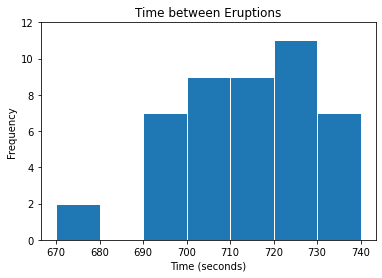

In [178]:
bins=np.arange(670,750, 10)
plt.hist(eruptions, bins=bins, edgecolor='w')
plt.xticks(bins)
plt.title("Time between Eruptions")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")
plt.ylim(0,12)
plt.show()

width = 5

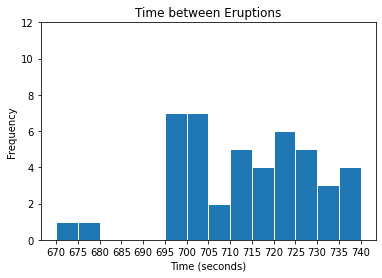

In [184]:
bins=np.arange(670,745, 5)
plt.hist(eruptions, bins=bins, edgecolor='w')
plt.xticks(bins)
plt.title("Time between Eruptions")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")
plt.ylim(0,12)
plt.show()

width = 1

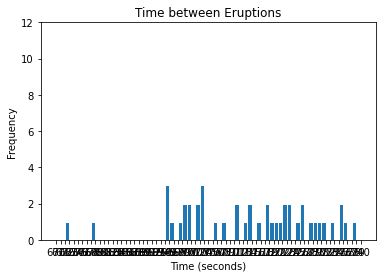

In [185]:
bins=np.arange(670,741, 1)
plt.hist(eruptions, bins=bins, edgecolor='w')
plt.xticks(bins)
plt.title("Time between Eruptions")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")
plt.ylim(0,12)
plt.show()

## Stemp-and-leaf plot

An individual is considered to be unemployed if they 
do not have a job, but are actively seeking 
employment. The following data represent the 
unemployment rate in each of the fifty United States 
plus the District of Columbia in June, 2008. 

In [189]:
!pip install stemgraphic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 514 kB/s 


(<Figure size 540x144 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f10e4cbdfd0>)

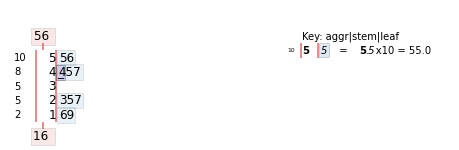

In [190]:
import stemgraphic
  
data = [16, 25, 47, 56, 23, 45, 19, 55, 44, 27]
  
# calling stem_graphic with required parameters,
# data and scale
stemgraphic.stem_graphic(data, scale = 10)

the raw data can be retrieved from the 
stem-and-leaf plot.

In [193]:
cars[:5]

[3, 0, 1, 2, 1]

## Dot plots

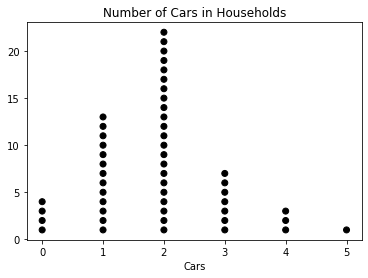

In [203]:
import numpy as np; np.random.seed(13)
import matplotlib.pyplot as plt

data = cars
bins = np.arange(7)-0.5

hist, edges = np.histogram(data, bins=bins)

y = np.arange(1,hist.max()+1)
x = np.arange(6)
X,Y = np.meshgrid(x,y)

plt.scatter(X,Y, c=Y<=hist, cmap="Greys")
plt.title("Number of Cars in Households")
plt.xlabel("Cars")
plt.show()

## Frequency Polygons

In [304]:
original_eruptions

,Time btw eruptions,Frequency,Relative Frequency
0,670 - 679,2,0.044444
1,680 - 689,0,0.000000
2,690 - 699,7,0.155556
3,700 - 709,9,0.200000
4,710 - 719,9,0.200000
5,720 - 729,11,0.244444
6,730 - 739,7,0.155556


In [305]:
original_eruptions['Class Midpoint'] = [675 + i for i in range(0,70,10)]

In [306]:
original_eruptions.loc[-1] = ['660 - 669', 0,0.,665]
original_eruptions.index = original_eruptions.index + 1
original_eruptions = original_eruptions.sort_values(by = 'Class Midpoint')
original_eruptions.reset_index(inplace = True)

In [309]:
original_eruptions = original_eruptions.drop(columns = 'index')

In [310]:
original_eruptions = original_eruptions.append({'Time btw eruptions': '740-749','Frequency': 0,'Relative Frequency':0.,'Class Midpoint':745},ignore_index = True)

In [318]:
original_eruptions = original_eruptions[:][:-1]

In [321]:
original_eruptions

,Time btw eruptions,Frequency,Relative Frequency,Class Midpoint
0,660 - 669,0,0.000000,665
1,670 - 679,2,0.044444,675
2,680 - 689,0,0.000000,685
3,690 - 699,7,0.155556,695
4,700 - 709,9,0.200000,705
5,710 - 719,9,0.200000,715
6,720 - 729,11,0.244444,725
7,730 - 739,7,0.155556,735
8,740-749,0,0.000000,745


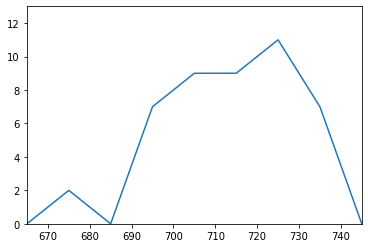

In [325]:
plt.plot(original_eruptions['Class Midpoint'],original_eruptions['Frequency'])
plt.xlim(665,745)
plt.ylim(0,13)
plt.show()

## Cumulative Frequency and Cumulative Relative Frequency

In [326]:
original_eruptions

,Time btw eruptions,Frequency,Relative Frequency,Class Midpoint
0,660 - 669,0,0.000000,665
1,670 - 679,2,0.044444,675
2,680 - 689,0,0.000000,685
3,690 - 699,7,0.155556,695
4,700 - 709,9,0.200000,705
5,710 - 719,9,0.200000,715
6,720 - 729,11,0.244444,725
7,730 - 739,7,0.155556,735
8,740-749,0,0.000000,745


In [334]:
CF = np.zeros(9)#cumulative freq
CRF = np.zeros(9)#cumulative relative freq
for i in range(9):
  CF[i] = sum(original_eruptions['Frequency'][0:i+1])
  CRF[i] = sum(original_eruptions['Relative Frequency'][0:i+1])

In [335]:
cumul = original_eruptions
cumul['Cumulative F']= CF
cumul['Cumulative Relative F'] = CRF

In [337]:
cumul[:][1:8]

,Time btw eruptions,Frequency,Relative Frequency,Class Midpoint,Cumulative F,Cumulative Relative F
1,670 - 679,2,0.044444,675,2.0,0.044444
2,680 - 689,0,0.000000,685,2.0,0.044444
3,690 - 699,7,0.155556,695,9.0,0.200000
4,700 - 709,9,0.200000,705,18.0,0.400000
5,710 - 719,9,0.200000,715,27.0,0.600000
6,720 - 729,11,0.244444,725,38.0,0.844444
7,730 - 739,7,0.155556,735,45.0,1.000000


## Frequency Ogive

In [342]:
ogive = cumul[:][1:8]
ogive['xaxis'] = [o[-3:] for o in ogive['Time btw eruptions']]

In [343]:
ogive

,Time btw eruptions,Frequency,Relative Frequency,Class Midpoint,Cumulative F,Cumulative Relative F,xaxis
1,670 - 679,2,0.044444,675,2.0,0.044444,679
2,680 - 689,0,0.000000,685,2.0,0.044444,689
3,690 - 699,7,0.155556,695,9.0,0.200000,699
4,700 - 709,9,0.200000,705,18.0,0.400000,709
5,710 - 719,9,0.200000,715,27.0,0.600000,719
6,720 - 729,11,0.244444,725,38.0,0.844444,729
7,730 - 739,7,0.155556,735,45.0,1.000000,739


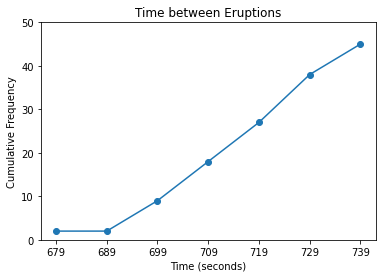

In [346]:
plt.plot(ogive['xaxis'],ogive['Cumulative F'],marker = 'o')
plt.title("Time between Eruptions")
plt.xlabel("Time (seconds)")
plt.ylabel("Cumulative Frequency")
plt.ylim(0,50)
plt.show()

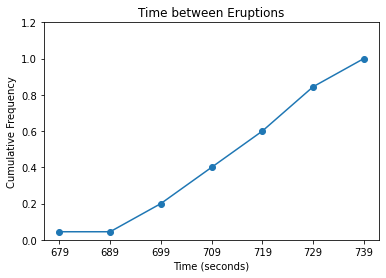

In [348]:
plt.plot(ogive['xaxis'],ogive['Cumulative Relative F'],marker = 'o')
plt.title("Time between Eruptions")
plt.xlabel("Time (seconds)")
plt.ylabel("Cumulative Frequency")
plt.ylim(0,1.2)
plt.show()

## Time Series Graphs

In [359]:
raw_ts = [[1990, 2753.2],
[1991, 2633.66],
[1992, 3168.83],
[1993, 3301.11],
[1994, 3834.44],
[1995, 5117.12],
[1996, 6448.27],
[1997, 7908.25],
[1998, 9212.84],
[1999, 9181.43],
[2000, 11497.12],
[2001, 10021.71],
[2002, 8342.38],
[2003, 10452.74],
[2004, 10783.75],
[2005 ,10783.01],
[2006 ,10717.50],
[2007, 13264.82]]

In [360]:
Year = []
ClosingValue = []
for r in raw_ts:
  y,c = r[0],r[1]
  Year.append(y)
  ClosingValue.append(c)

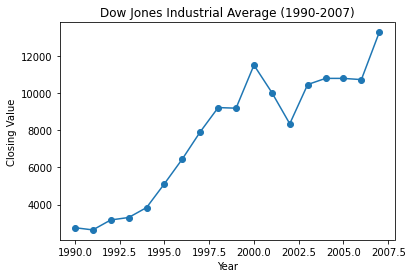

In [361]:
plt.plot(Year,ClosingValue,marker = 'o')
plt.title("Dow Jones Industrial Average (1990-2007)")
plt.xlabel("Year")
plt.ylabel("Closing Value")
plt.show()

## Misleading Graphs

In [362]:
raw_m = [[1950, 68.2],
[1960, 69.7],
[1970, 70.8],
[1980, 73.7],
[1990, 75.4],
[2000, 77.0]]

In [363]:
yr = []
le = []
for var in raw_m:
  yr.append(var[0])
  le.append(var[1])

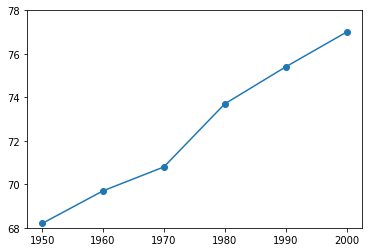

In [366]:
plt.plot(yr,le,marker = 'o')
plt.ylim(68,78)
plt.show()

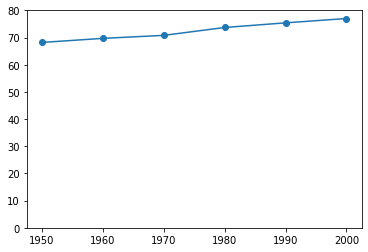

In [367]:
plt.plot(yr,le,marker = 'o')
plt.ylim(0,80)
plt.show()